# Project 1 - Aircraft Crashes

---------------------------------------------------

In [1]:
# Import dependencies to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the Dataset

In [2]:
# Load the dataset
flight_data_df = pd.read_csv("output_data/flight_data.csv")
flight_data_df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


## Exploratory Data Analysis

In [3]:
# Total Number of Rows and Columns

total_rows, total_cols = flight_data_df.shape
print("Total Rows:", total_rows)
print("Total Columns:", total_cols)

Total Rows: 5268
Total Columns: 14


In [4]:
total_flights = flight_data_df.shape[0]
print("Total number of flights:", total_flights)

Total number of flights: 5268


In [5]:
# Read the columns

flight_data_df.columns

Index(['index', 'Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route',
       'Type', 'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground',
       'Summary'],
      dtype='object')

In [6]:
# Data types of columns
data_types = flight_data_df.dtypes
print("Data Types:")
print(data_types)

Data Types:
index             int64
Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object


In [7]:
# Summary statistics
summary_stats = flight_data_df.describe()
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
            index       Aboard   Fatalities       Ground
count  5268.00000  5246.000000  5256.000000  5246.000000
mean   2633.50000    27.554518    20.068303     1.608845
std    1520.88494    43.076711    33.199952    53.987827
min       0.00000     0.000000     0.000000     0.000000
25%    1316.75000     5.000000     3.000000     0.000000
50%    2633.50000    13.000000     9.000000     0.000000
75%    3950.25000    30.000000    23.000000     0.000000
max    5267.00000   644.000000   583.000000  2750.000000


In [8]:
# Total sum of fatalities
total_fatalities = flight_data_df['Fatalities'].sum()
print("Total Fatalities:", total_fatalities)


Total Fatalities: 105479.0


In [9]:
# Total sum of passengers
total_aboard = flight_data_df['Aboard'].sum()
print("Total number on board:", total_aboard)

Total number on board: 144551.0


In [10]:
# Calculate the total number of survivors
total_passengers_aboard = flight_data_df['Aboard'].sum()
total_fatalities = flight_data_df['Fatalities'].sum()
total_survivors = total_passengers_aboard - total_fatalities

print("Total number of survivors:", total_survivors)


Total number of survivors: 39072.0


In [11]:
# Calculate the percentage of survivors and fatalities
percent_survivors = (total_survivors / total_passengers_aboard) * 100
percent_fatalities = (total_fatalities / total_passengers_aboard) * 100

print("Percentage of survivors:", percent_survivors)
print("Percentage of fatalities:", percent_fatalities)


Percentage of survivors: 27.029906399817367
Percentage of fatalities: 72.97009360018264


In [12]:
# Check for missing values
missing_values = flight_data_df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64


In [13]:
# Convert Date Column to DateTime Format
flight_data_df['Date'] = pd.to_datetime(flight_data_df['Date'])
flight_data_df['Date'].head()

0   1908-09-17
1   1912-07-12
2   1913-08-06
3   1913-09-09
4   1913-10-17
Name: Date, dtype: datetime64[ns]

In [14]:
# Extract year, month, and day from dates
flight_data_df['Year'] = flight_data_df['Date'].dt.year
flight_data_df['Month'] = flight_data_df['Date'].dt.month
flight_data_df['Day'] = flight_data_df['Date'].dt.day

In [15]:
# Summary statistics for dates
date_summary = flight_data_df[['Year', 'Month', 'Day']].describe()
print("Summary Statistics for Dates:")
print(date_summary)

Summary Statistics for Dates:
              Year        Month          Day
count  5268.000000  5268.000000  5268.000000
mean   1971.300304     6.643888    15.739560
std      22.387541     3.546162     8.795405
min    1908.000000     1.000000     1.000000
25%    1954.000000     3.000000     8.000000
50%    1973.000000     7.000000    16.000000
75%    1990.000000    10.000000    23.000000
max    2009.000000    12.000000    31.000000


In [16]:
# Convert Month to string format

# flight_data_df['Month'] = pd.to_datetime(flight_data_df['Date'], format ='%m/%d/%Y').dt.month
flight_data_df['Month'] = pd.to_datetime(flight_data_df['Date'], format ='%m/%d/%Y').dt.month_name()
flight_data_df['Month'].head()

0    September
1         July
2       August
3    September
4      October
Name: Month, dtype: object

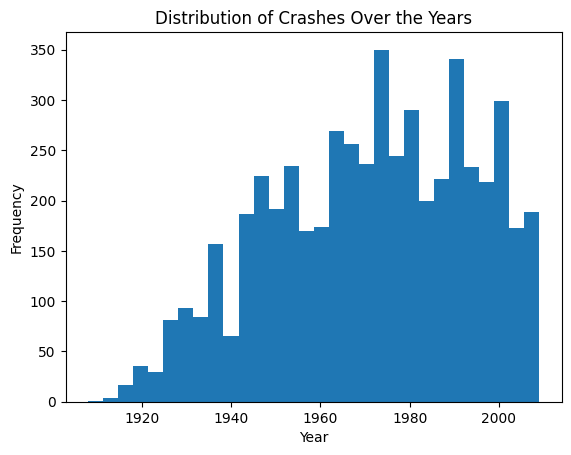

In [17]:
# Visualize Date Distribution

# Plot histogram of years to visualize date distribution

plt.hist(flight_data_df['Year'], bins=30)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Crashes Over the Years')
plt.savefig('output_data/1_histogram_Distribution_of_Yrs.png')
plt.show()


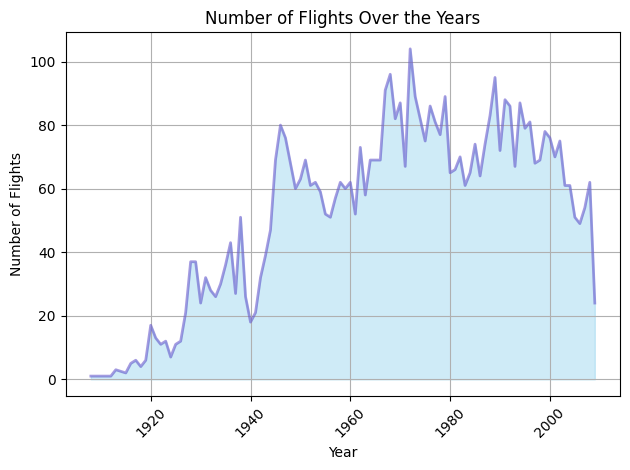

In [18]:
# Number of flights over the years

# First, convert the 'Date' column to datetime format
flight_data_df['Date'] = pd.to_datetime(flight_data_df['Date'])

# Extract year and month from the 'Date' column
flight_data_df['Year'] = flight_data_df['Date'].dt.year
flight_data_df['Month'] = flight_data_df['Date'].dt.month_name()

# Group the data by year and count the number of flights per year
flights_per_year = flight_data_df.groupby('Year').size()

# Plot an area graph to show the trend of flights over the years
plt.fill_between(flights_per_year.index, flights_per_year.values, color="skyblue", alpha=0.4)
plt.plot(flights_per_year.index, flights_per_year.values, color="Slateblue", alpha=0.6, linewidth=2)

plt.title('Number of Flights Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('output_data/2_LineAndFill_FlightsOverTheYrs.png')
plt.show()

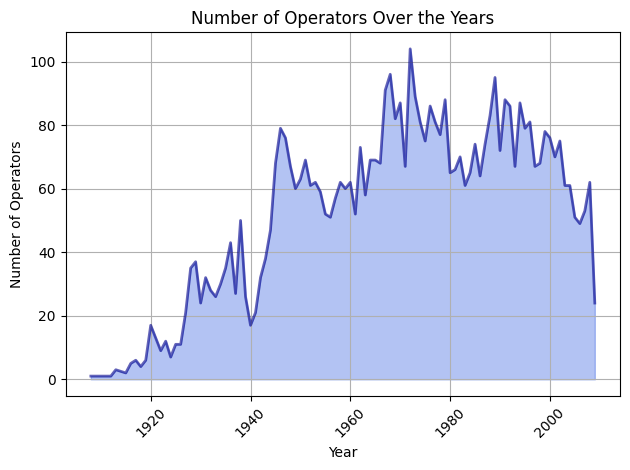

In [19]:
# Number of operators over the years

# Group the data by year and count the number of Operators per year
operators_per_year = flight_data_df.groupby('Year')['Operator'].count()

# Plot an area graph to show the trend of flights over the years
plt.fill_between(operators_per_year.index, operators_per_year.values, color="royalblue", alpha=0.4)
plt.plot(operators_per_year.index, operators_per_year.values, color="darkblue", alpha=0.6, linewidth=2)

plt.title('Number of Operators Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Operators')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('output_data/3_LineAndFill_OperatorsOverTheYrs.png')
plt.show()

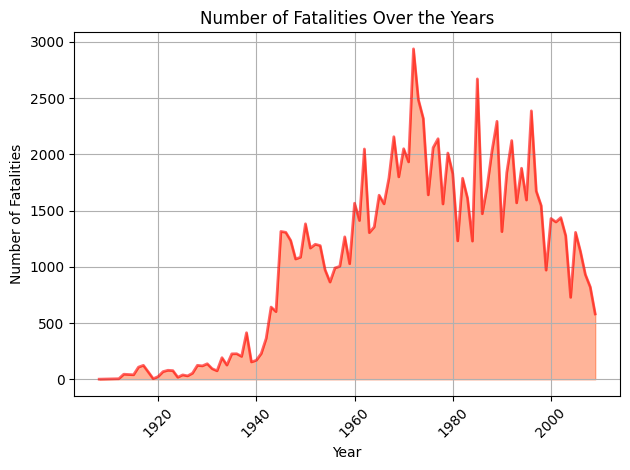

In [20]:
# Number of fatalities over the years

# Group the data by year and count the number of fatalities per year
fatalities_per_year = flight_data_df.groupby('Year')['Fatalities'].sum()

# Plot an area graph to show the trend of flights over the years
plt.fill_between(fatalities_per_year.index, fatalities_per_year.values, color="orangered", alpha=0.4)
plt.plot(fatalities_per_year.index, fatalities_per_year.values, color="red", alpha=0.6, linewidth=2)

plt.title('Number of Fatalities Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('output_data/4_LineAndFill_FatalitiesOverTheYrs.png')
plt.show()

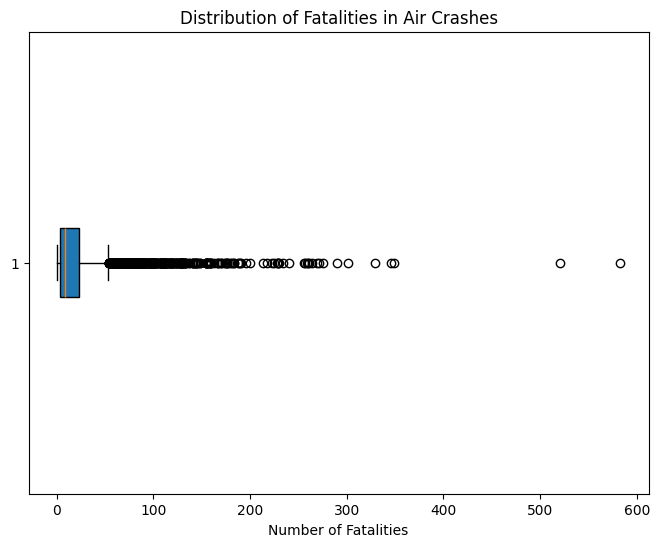

In [21]:
# Distribution of fatalities 

# Drop NaN values from the 'Fatalities' column
fatalities_dist = flight_data_df['Fatalities'].dropna()

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(fatalities_dist, patch_artist=True, vert=False)

# Add labels and title
plt.xlabel('Number of Fatalities')
plt.title('Distribution of Fatalities in Air Crashes')

# Save the plot as an image file
plt.savefig('output_data/5_Box_Dist_of_Fatalities_in_AirCrashes.png')

# Show plot
plt.show()

In [22]:
# flight_data_df['Fatalities'].unique()

In [23]:
# Summarize the fatalities
fatalities_summary = fatalities_dist.describe().map("{:,.0f}".format)
# total_fatalities_formatted = "{:,.0f}".format(total_fatalities_formatted)
# print("Total Fatalities:", fatalities_summary)
print(f'In summary, these were the fatalities: \n{fatalities_summary}')

# flight_data_df['Fatalities'] = flight_data_df['Fatalities'].describe().map("{:,.0f}".format)

# Convert 'Fatalities' column to numeric
# flight_data_df['Fatalities'] = pd.to_numeric(flight_data_df['Fatalities'], errors='coerce')

# Replace NaN values in the 'Fatalities' column with 0
# flight_data_df['Fatalities'].fillna(0, inplace=True)

# # Convert the 'Fatalities' column to numeric data type
# flight_data_df['Fatalities'] = pd.to_numeric(flight_data_df['Fatalities'])

# # Calculate the total fatalities
# total_fatalities = flight_data_df['Fatalities'].sum()

# total_fatalities.describe()

# formatted_total_fatalities = "{:,.0f}".format(total_fatalities)
# print("Total fatalities:", formatted_total_fatalities)
print('-------------------------------------------------------')



In summary, these were the fatalities: 
count    5,256
mean        20
std         33
min          0
25%          3
50%          9
75%         23
max        583
Name: Fatalities, dtype: object
-------------------------------------------------------


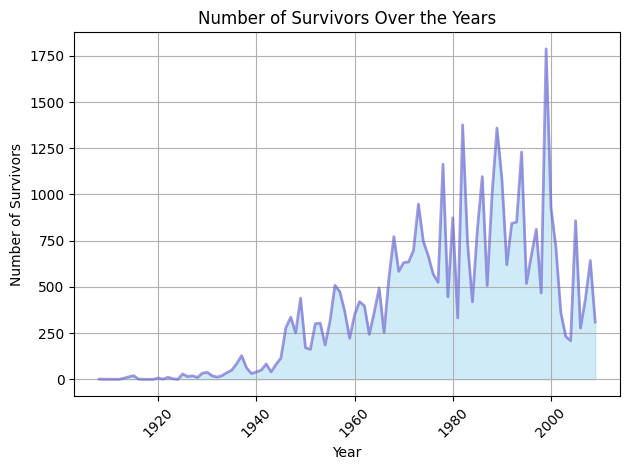

In [24]:
# Number of survivors over the years

# Calculate the number of survivors as the difference between Aboard and Fatalities
flight_data_df['Survivors'] = flight_data_df['Aboard'] - flight_data_df['Fatalities']

# Group the data by year and sum the number of survivors per year
survivors_per_year = flight_data_df.groupby('Year')['Survivors'].sum()

# Plot an area graph to show the trend of survivors over the years
plt.fill_between(survivors_per_year.index, survivors_per_year.values, color="skyblue", alpha=0.4)
plt.plot(survivors_per_year.index, survivors_per_year.values, color="Slateblue", alpha=0.6, linewidth=2)

plt.title('Number of Survivors Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('output_data/6_LineandFill_SurvivorsOvertheYears.png')
plt.show()


## Analysis by Project Objective

### Objective 1: To find out which aircraft types and operators were associated with the highest number of fatalities in aviation crashes 

In [25]:
# Display the top 10 aircraft types and operators with the highest total fatalities
# Group the data by aircraft type and operator, then sum the fatalities
fatalities_by_aircraft_operator = flight_data_df.groupby(['Type', 'Operator'])['Fatalities'].sum()

# Sort the groups by total fatalities in descending order
fatalities_by_aircraft_operator_sorted = fatalities_by_aircraft_operator.sort_values(ascending=False)

# Display the top 20 entries
top_fatalities = fatalities_by_aircraft_operator_sorted.head(20)
top_fatalities


Type                                  Operator                                  
Ilyushin IL-18B                       Aeroflot                                      598.0
Boeing B-747-121 / Boeing B-747-206B  Pan American World Airways / KLM              583.0
Tupolev TU-104B                       Aeroflot                                      561.0
Boeing B-747-237B                     Air India                                     542.0
Boeing B-747-SR46                     Japan Air Lines                               520.0
Tupolev TU-134A                       Aeroflot                                      479.0
Tupolev TU-104A                       Aeroflot                                      470.0
Yakovlev YAK-40                       Aeroflot                                      457.0
Antonov AN-24                         Aeroflot                                      442.0
Tupolev TU-154B-2                     Aeroflot                                      409.0
Tupolev TU-124     

In [26]:
# Aircrafts and the total fatalities

fatalities_by_aircraft = flight_data_df.groupby('Type'
                                               )['Fatalities'].sum().reset_index().sort_values(
    by = 'Fatalities', ascending=False)

# Format with 1000 separator no decimal
fatalities_by_aircraft['Fatalities']= fatalities_by_aircraft['Fatalities'].apply(lambda x: "{:,.0f}".format(x))

print(fatalities_by_aircraft.head())
print('----------------------------------------------------------------------')
print(f'Top 20 aircrafts with the highest total fatalities', fatalities_by_aircraft.head(20))

                           Type Fatalities
1178               Douglas DC-3      4,793
125               Antonov AN-26      1,068
1246              Douglas DC-6B      1,055
1089               Douglas C-47      1,046
1889  McDonnell Douglas DC-9-32        951
----------------------------------------------------------------------
Top 20 aircrafts with the highest total fatalities                                           Type Fatalities
1178                              Douglas DC-3      4,793
125                              Antonov AN-26      1,068
1246                             Douglas DC-6B      1,055
1089                              Douglas C-47      1,046
1889                 McDonnell Douglas DC-9-32        951
1230                              Douglas DC-4        930
1568                           Ilyushin IL-18B        852
2340                           Yakovlev YAK-40        834
2231                           Tupolev TU-134A        809
1853                McDonnell Douglas DC

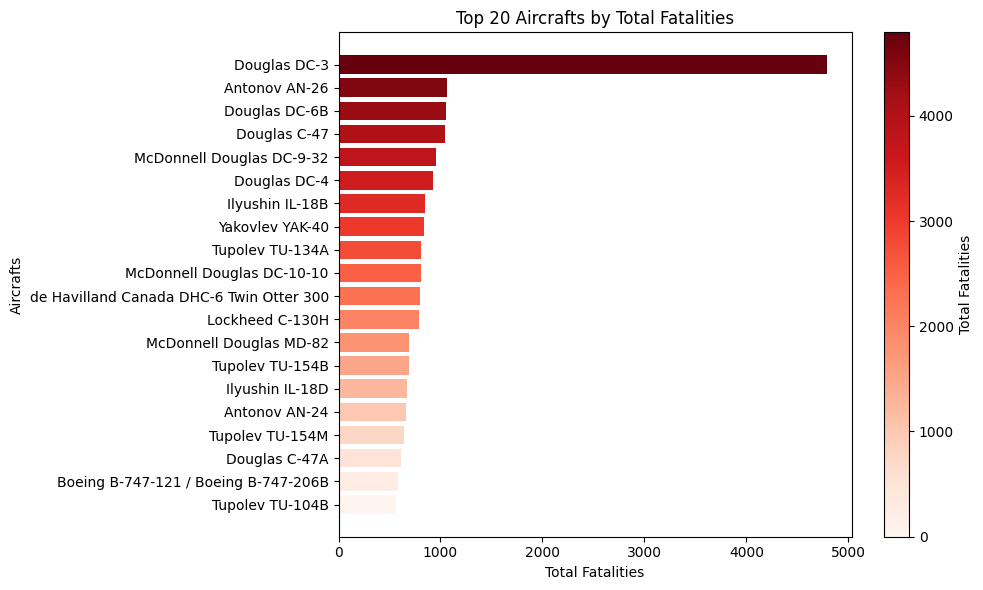

In [27]:
# Plot top 20 flights with highest fatalities

# Group by 'Operator' and sum the 'Fatalities', then select the top 20 operators
top_20_flights = flight_data_df.groupby('Type')['Fatalities'].sum().nlargest(20)

# Create a color map with gradients of red
colors = plt.cm.Reds(np.linspace(0, 1, len(top_20_flights)))[::-1]  # Reverse the colormap order

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot with gradient colors
bars = plt.barh(top_20_flights.index, top_20_flights.values, color=colors)
plt.xlabel('Total Fatalities')
plt.ylabel('Aircrafts')
plt.title('Top 20 Aircrafts by Total Fatalities')

# Add a color gradient key
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=top_20_flights.max()))
sm._A = []  # Empty array required for the scalar mappable
cbar = plt.colorbar(sm, orientation='vertical', ax=plt.gca())  # Explicitly provide the Axes object
cbar.set_label('Total Fatalities')

plt.gca().invert_yaxis()  # Invert y-axis to have the highest fatalities at the top

plt.tight_layout()

plt.savefig('output_data/7_hbar_FatalitiesInTop20Aircrafts.png')

plt.show()

In [28]:
# Group the data by aircraft type and operator, and sum up the fatalities
fatalities_by_aircraft_operator = flight_data_df.groupby(['Type', 'Operator'])['Fatalities'].sum().reset_index()

fatalities_by_aircraft_operator.head()
fatalities_by_aircraft_operator.sort_values(by='Fatalities', ascending=False).head()

,Type,Operator,Fatalities
2917,Ilyushin IL-18B,Aeroflot,598.0
866,Boeing B-747-121 / Boeing B-747-206B,Pan American World Airways / KLM,583.0
4039,Tupolev TU-104B,Aeroflot,561.0
878,Boeing B-747-237B,Air India,542.0
888,Boeing B-747-SR46,Japan Air Lines,520.0


In [29]:
# Operators with the highest Fatalities

# Group the data by operator and sum the fatalities
fatalities_by_operator = flight_data_df.groupby('Operator')['Fatalities'].sum()

# Sort the groups by total fatalities in descending order
top_fatalities_operators = fatalities_by_operator.sort_values(ascending=False).head(20)

# # Format the number of fatalities with thousands separator and no decimal
# formatted_fatalities = top_fatalities_operators.map('{:,}'.format)

# Format the number of fatalities with thousand separators and return as whole numbers
formatted_fatalities = top_fatalities_operators.apply(lambda x: "{:,.0f}".format(x))

print("Top 20 Operators with the Highest Number of Total Fatalities:")
print(formatted_fatalities)


Top 20 Operators with the Highest Number of Total Fatalities:
Operator
Aeroflot                           7,156
Military - U.S. Air Force          3,717
Air France                         1,734
American Airlines                  1,421
Pan American World Airways         1,302
Military - U.S. Army Air Forces    1,070
United Air Lines                   1,021
AVIANCA                              941
Turkish Airlines (THY)               891
Indian Airlines                      863
China Airlines (Taiwan)              847
Air India                            827
Military - Russian Air Force         797
Trans World Airlines                 784
Military - U.S. Navy                 767
Japan Air Lines                      764
Korean Airlines                      713
Eastern Air Lines                    710
Pakistan International Airlines      693
KLM Royal Dutch Airlines             616
Name: Fatalities, dtype: object


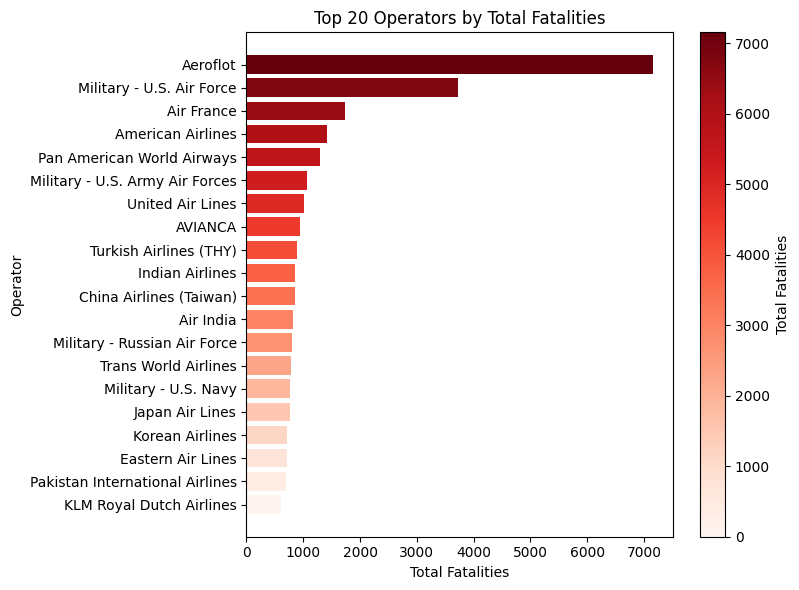

In [30]:
# Plot top 20 operators with highest fatalities

# Group by 'Operator' and sum the 'Fatalities', then select the top 20 operators
top_operators_20 = flight_data_df.groupby('Operator')['Fatalities'].sum().nlargest(20)

# Create a color map with gradients of red
colors = plt.cm.Reds(np.linspace(0, 1, len(top_operators_20)))[::-1]

# Create a horizontal bar plot with gradient colors
plt.figure(figsize=(8, 6))
plt.barh(top_operators_20.index, top_operators_20.values, color=colors)
plt.xlabel('Total Fatalities')
plt.ylabel('Operator')
plt.title('Top 20 Operators by Total Fatalities')

# Add a color gradient key
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=top_operators_20.max()))
sm._A = []  # Empty array required for the scalar mappable
cbar = plt.colorbar(sm, orientation='vertical', ax=plt.gca())  # Explicitly provide the Axes object
cbar.set_label('Total Fatalities')

plt.gca().invert_yaxis()  # Invert y-axis to have the highest fatalities at the top
plt.tight_layout()
plt.savefig('output_data/8_hbar_FatalitiesInTop20Operators.png')
plt.show()



In [31]:
# Create a new column 'Civilian/Military' based on the presence of 'military' in the 'Type' column
flight_data_df['Civilian/Military'] = flight_data_df['Operator'].apply(lambda x: 'Military' if isinstance(x, str) and 'military' in x.lower() else 'Civilian')

# Display the unique values in the new column
flight_data_df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Month,Day,Survivors,Civilian/Military
0,0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,September,17,1.0,Military
1,1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,July,12,0.0,Military
2,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,August,6,0.0,Civilian
3,3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,September,9,6.0,Military
4,4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,October,17,0.0,Military


In [32]:
# Fatalities based on Civilian/Military

# Group by 'Civilian/Military' and calculate total fatalities
fatalities_by_category = flight_data_df.groupby('Civilian/Military')['Fatalities'].sum()

# Group by 'Civilian/Military' and calculate fatality statistics
fatalities_by_category_summs = flight_data_df.groupby('Civilian/Military')['Fatalities'].describe()

# Format the results for better readability
fatalities_by_category = fatalities_by_category.apply(lambda x: "{:,.0f}".format(x))
fatalities_by_category_summs = fatalities_by_category_summs.apply(lambda x: x.apply(lambda y: "{:,.0f}".format(y)))

# Print the results
print("Total fatalities by civilian and military aircraft:")
print(fatalities_by_category)
print("\nFatality statistics for civilian and military aircraft:")
print(fatalities_by_category_summs)

Total fatalities by civilian and military aircraft:
Civilian/Military
Civilian    85,816
Military    19,663
Name: Fatalities, dtype: object

Fatality statistics for civilian and military aircraft:
                   count mean std min 25% 50% 75%  max
Civilian/Military                                     
Civilian           4,477   19  34   0   3   7  20  583
Military             779   25  24   0  12  20  30  275


## Objective 2: To determine when and where aviation crashes occured, and whether there any discernible patterns or trends in terms of time and location

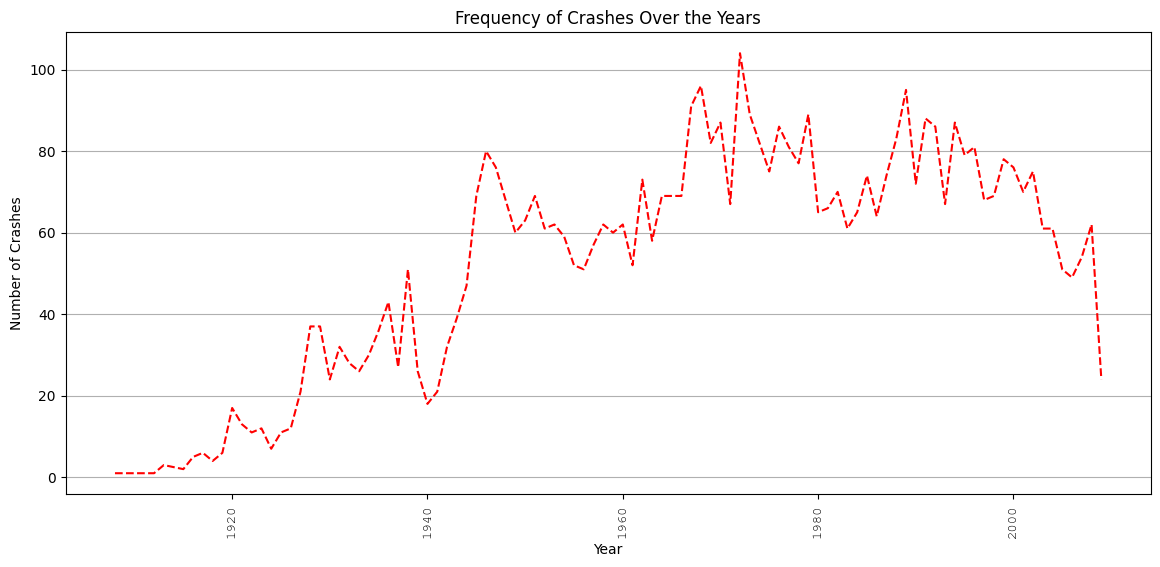

In [33]:
# Extract date and location information
dates = flight_data_df['Date']
locations = flight_data_df['Location']

# Date Analysis
# Example: Histogram of crash frequency over years
plt.figure(figsize=(14, 6))
dates.dt.year.value_counts().sort_index().plot(kind='line', color = 'r', style = '--')
plt.title('Frequency of Crashes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90, size=10, fontname='Courier New')
plt.grid(axis='y')
plt.savefig('output_data/9_Line_CrashesOvertheYears.png')
plt.show()

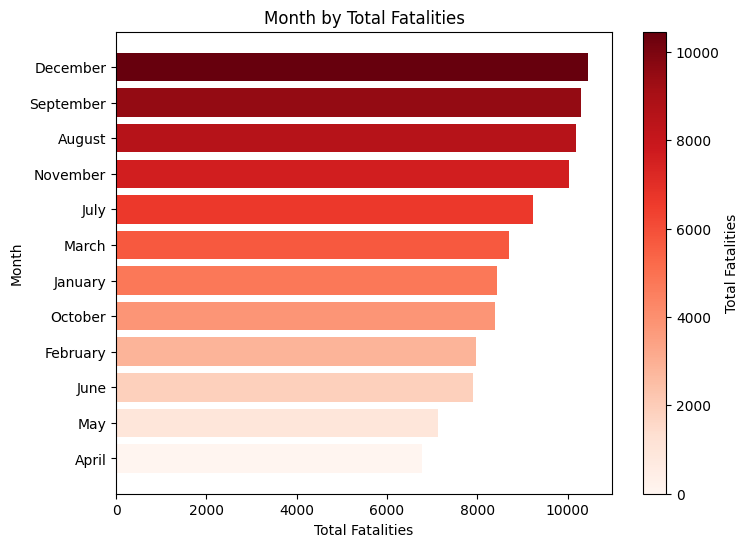

In [34]:
# Fatalities by month

# Create a color map with gradients of red

# Group by 'Month' and sum the 'Fatalities'
flight_month = flight_data_df.groupby('Month')['Fatalities'].sum()

# sort the sum of fatalities
flight_month_sorted = flight_month.sort_values(ascending=False)


# Create a color map with gradients of red
colors = plt.cm.Reds(np.linspace(0, 1, len(flight_month_sorted)))[::-1]  # Reverse the colormap order

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a horizontal bar plot with gradient colors
bars = plt.barh(flight_month_sorted.index, flight_month_sorted.values, color=colors)
plt.xlabel('Total Fatalities')
plt.ylabel('Month')
plt.title('Month by Total Fatalities')

# Add a color gradient key
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=0, vmax=flight_month_sorted.max()))
sm._A = []  # Empty array required for the scalar mappable
cbar = plt.colorbar(sm, orientation='vertical', ax=plt.gca())  # Explicitly provide the Axes object
cbar.set_label('Total Fatalities')

plt.gca().invert_yaxis()  # Invert y-axis to have the highest fatalities at the top

plt.savefig('output_data/10_hbar_Fatalities_by_Month.png')

plt.show()

In [35]:
# Describe Fatalities by Month
print(f'These have been the total number of fatalities each month: \n{flight_month.sort_values(ascending=False)}')

print(f"Average fatalities per month are as follows: \n{flight_data_df.groupby('Month')['Fatalities'].mean().sort_values(ascending=False)}")


These have been the total number of fatalities each month: 
Month
December     10459.0
September    10286.0
August       10174.0
November     10033.0
July          9232.0
March         8708.0
January       8425.0
October       8388.0
February      7966.0
June          7909.0
May           7130.0
April         6769.0
Name: Fatalities, dtype: float64
Average fatalities per month are as follows: 
Month
September    22.458515
November     22.099119
July         21.620609
August       21.464135
June         20.542857
December     20.269380
February     20.167089
May          19.270270
March        19.222958
October      18.557522
April        17.907407
January      17.054656
Name: Fatalities, dtype: float64


In [36]:
# Create a dataframe summarizing the fatalities by month with the total number of deaths and the average number as well

# Step 1: Extract month from the date column
flight_data_df['Date'] = pd.to_datetime(flight_data_df['Date'])  # Convert Date column to datetime
flight_data_df['Month'] = flight_data_df['Date'].dt.month  # Extract month from the date

# Step 2: Group data by month and calculate total fatalities and average deaths
monthly_stats = flight_data_df.groupby('Month')['Fatalities'].agg(['sum', 'mean']).reset_index()
monthly_stats.columns = ['Month', 'Total Fatalities', 'Average Deaths']

# Step 3: Create a DataFrame with months, total fatalities, and average deaths
months_of_year = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_stats['Month'] = monthly_stats['Month'].apply(lambda x: months_of_year[x-1])

# Transpose and Display the resulting DataFrame
monthly_stats.T

,0,1,2,3,4,5,6,7,8,9,10,11
Month,January,February,March,April,May,June,July,August,September,October,November,December
Total Fatalities,8425.0,7966.0,8708.0,6769.0,7130.0,7909.0,9232.0,10174.0,10286.0,8388.0,10033.0,10459.0
Average Deaths,17.054656,20.167089,19.222958,17.907407,19.27027,20.542857,21.620609,21.464135,22.458515,18.557522,22.099119,20.26938


In [37]:
# Crashes per decade

# Step 1: Extract year from the date column
flight_data_df['Decade'] = flight_data_df['Date'].dt.year

# # Step 2: Define the bins for decades starting at 1900
# decade_bins = range(1900, flight_data_df['Year'].max() + 11, 10)

# # Step 3: Group data by decade and count the number of crashes
# crashes_per_decade = flight_data_df.groupby(pd.cut(flight_data_df['Year'], bins=decade_bins, right=False), observed=False).size()

# Define the bins for decades starting at 1900
decade_bins = range(1900, flight_data_df['Decade'].max() + 11, 10)

# Define the labels for the bins
decade_labels = [str(year) for year in decade_bins[:-1]]

# Group the data by decades using pd.cut and specify custom labels
# crashes_per_decade = flight_data_df.groupby(pd.cut(flight_data_df['Decade'], bins=decade_bins, labels=decade_labels, right=False)).size()
crashes_per_decade = flight_data_df.groupby(pd.cut(flight_data_df['Decade'], bins=decade_bins, labels=decade_labels, right=False), observed=False).size()

# Display the resulting Series
print(crashes_per_decade)

Decade
1900      1
1910     27
1920    178
1930    323
1940    510
1950    596
1960    721
1970    837
1980    717
1990    775
2000    583
dtype: int64


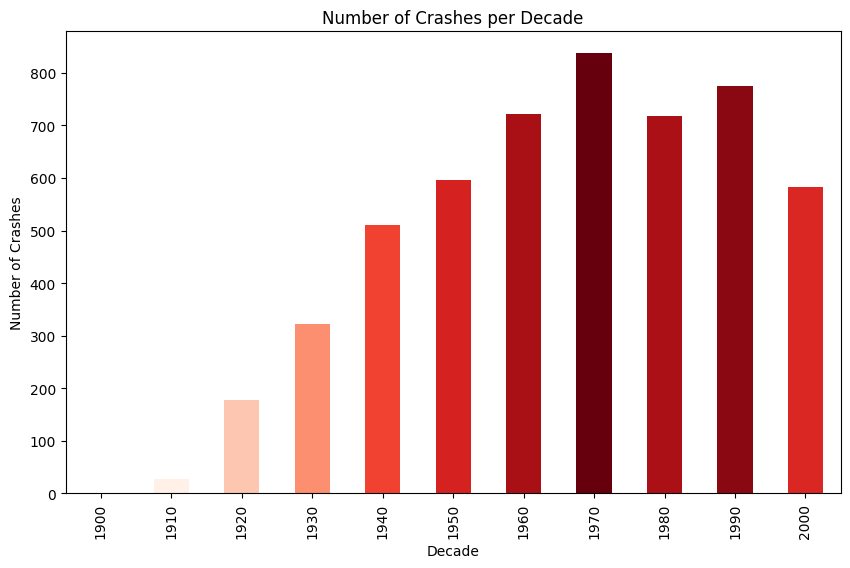

In [38]:
# Plot the bar chart for number of crashes per decade

# Find the maximum value in crashes_per_decade
max_value = crashes_per_decade.max()

# Define colors with gradient of red, adjusting based on the maximum value
colors = plt.cm.Reds(crashes_per_decade / max_value)

# Plot the bar chart for number of crashes per decade
plt.figure(figsize=(10, 6))
crashes_per_decade.plot(kind='bar', color=colors)
plt.xlabel('Decade')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes per Decade')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.grid(axis='y')  # Add grid lines along the y-axis
plt.savefig('output_data/11_bar_Crashes_per_Decade.png')
plt.show()


### Wrangle the location column in the dataset further to generate cities and countries that will be used in merging with world cities dataset

In [39]:
flight_data_df[[1,2,3,4]] = flight_data_df['Location'].str.split(', ', expand=True)
flight_data_df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,...,Year,Month,Day,Survivors,Civilian/Military,Decade,1,2,3,4
0,0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,...,1908,9,17,1.0,Military,1908,Fort Myer,Virginia,None,None
1,1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,...,1912,7,12,0.0,Military,1912,AtlantiCity,New Jersey,None,None
2,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,...,1913,8,6,0.0,Civilian,1913,Victoria,British Columbia,Canada,None
3,3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,...,1913,9,9,6.0,Military,1913,Over the North Sea,None,None,None
4,4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,...,1913,10,17,0.0,Military,1913,Near Johannisthal,Germany,None,None


In [40]:
# Load world cities data
world_cities_df = pd.read_csv('output_data/worldcities.csv')
world_cities_df.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629


In [41]:
# Extract city names from the Location column
flight_data_df['City'] = flight_data_df['Location'].str.split(', ').str[0]

# Merge flight data with world cities data based on city names
merged_df = pd.merge(flight_data_df, world_cities_df, how='left', left_on='City', right_on='city')

# Now merged_df contains latitude and longitude information for each flight location
# You can perform further analysis using this merged DataFrame
merged_df = merged_df[~(merged_df['lat'].isna() | merged_df['lng'].isna())]

merged_df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
2,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,...,Victoria,48.4283,-123.3647,Canada,CA,CAN,British Columbia,admin,363222.0,1.124147e+09
3,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,...,Victoria,15.5781,120.6819,Philippines,PH,PHL,Tarlac,NaN,69370.0,1.608955e+09
4,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,...,Victoria,28.8287,-96.9849,United States,US,USA,Texas,NaN,65656.0,1.840023e+09
5,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,...,Victoria,13.1719,121.2756,Philippines,PH,PHL,Oriental Mindoro,NaN,52175.0,1.608651e+09
6,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,...,Victoria,14.2250,121.3250,Philippines,PH,PHL,Laguna,NaN,43408.0,1.608591e+09


In [42]:
import hvplot.pandas
import requests

In [43]:
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable


In [44]:
# !conda install -c pyviz hvplot geoviews
# !pip install census
# !pip install citipy
# !pip install hvplot holoviews

In [45]:
merged_df.columns

Index([            'index',              'Date',              'Time',
                'Location',          'Operator',          'Flight #',
                   'Route',              'Type',      'Registration',
                   'cn/In',            'Aboard',        'Fatalities',
                  'Ground',           'Summary',              'Year',
                   'Month',               'Day',         'Survivors',
       'Civilian/Military',            'Decade',                   1,
                         2,                   3,                   4,
                    'City',              'city',        'city_ascii',
                     'lat',               'lng',           'country',
                    'iso2',              'iso3',        'admin_name',
                 'capital',        'population',                'id'],
      dtype='object')

In [46]:
# # Import API key
# from api_keys import geoapify_key
# from requests.structures import CaseInsensitiveDict

In [47]:
# # %%capture --no-display

# map_plot = merged_df.hvplot.points('Lng',
#             'Lat',
#             geo=True, 
#             tiles='OSM', 
#             frame_width=800, 
#             frame_height=500, 
#             color='admin_name',
#             alpha=0.7,
#             hover=True,
#             hover_cols='all',
#             use_index=False,
#             s='Fatalities',
#             scale=1.2)

# # Display the plot inline
# map_plot

# # # Save the plot as a PNG image
# # # hvplot.save(map_plot, 'output_data/city_locations_with_aircrashes1.html', fmt='html')


In [48]:
# !pip install folium

In [49]:
# import folium

# # Create a base map
# m = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)

# # Filter out rows with missing latitude and longitude values
# valid_rows = merged_df.dropna(subset=['lat', 'lng'])

# # Add markers for each valid point in your dataset
# for index, row in valid_rows.iterrows():
#     folium.Marker(
#         [row['lat'], row['lng']],
#         popup=row['city'],
#         # icon=folium.Icon(icon='glyphicon-map-marker', prefix='glyphicon', color='blue', icon_size=(15, 15))
#         icon = folium.Icon(icon='plane', prefix='fa', color='red', icon_size=(15, 15))

#     ).add_to(m)

# # Save the map to an HTML file in output_data folder
# output_file = "output_data/map.html"
# m.save(output_file)

# # Display the map
# m

# import folium

# # Create a base map
# m = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)

# # Filter out rows with missing latitude and longitude values
# valid_rows = merged_df.dropna(subset=['lat', 'lng'])

# # Add markers for each valid point in your dataset
# for index, row in valid_rows.iterrows():
#     folium.Marker(
#         [row['lat'], row['lng']],
#         popup=row['city'],
#         icon=folium.Icon(icon='plane', prefix='fa', color='red', icon_size=(15, 15))
#     ).add_to(m)



# # Display the map
# m



In [50]:
# import folium
# from IPython.display import IFrame

# # Create a base map
# m = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)

# # Filter out rows with missing latitude and longitude values
# valid_rows = merged_df.dropna(subset=['lat', 'lng'])

# # Add markers for each valid point in your dataset
# for index, row in valid_rows.iterrows():
#     folium.Marker(
#         [row['lat'], row['lng']],
#         popup=row['city'],
#         icon = folium.Icon(icon='plane', prefix='fa', color='red', icon_size=(15, 15))
#     ).add_to(m)

# # Save the map to an HTML file in output_data folder
# output_file = "output_data/map.html"
# m.save(output_file)

# # Display the HTML file using IFrame
# IFrame(src=output_file, width='100%', height=500)


In [51]:
import folium
from IPython.display import IFrame

# Define the center coordinates for the map
latitude_center = 0  # Replace 0 with the desired latitude
longitude_center = 0  # Replace 0 with the desired longitude

# Create a base map
m = folium.Map(location=[latitude_center, longitude_center], zoom_start=2)

# Filter out rows with missing latitude and longitude values
valid_rows = merged_df.dropna(subset=['lat', 'lng'])

# Add markers for each valid point in your dataset
for index, row in valid_rows.iterrows():
    popup_text = f"City: {row['city']}<br>Country: {row['country']}<br>Aircraft(s): {row['Type']}<br>No. of Fatalities: {row['Fatalities']}<br>Years of Crashes: {row['Year']}<br>Time of Crashes: {row['Time']}<br>Flight Operator: {row['Operator']}"
    folium.Marker(
        [row['lat'], row['lng']],
        popup=popup_text,
        icon=folium.Icon(icon='plane', prefix='fa', color='red', icon_size=(15, 15))
    ).add_to(m)

# Save the map to an HTML file in output_data folder
# output_file = "output_data/map.png"
output_file = "output_data/12_map.html"

m.save(output_file)

# Display the HTML file using IFrame
IFrame(src=output_file, width='100%', height=500)


In [52]:
# import folium
# from IPython.display import IFrame

# # Create a base map
# m = folium.Map(location=[latitude_center, longitude_center], zoom_start=2)

# # Filter out rows with missing latitude and longitude values
# valid_rows = merged_df.dropna(subset=['lat', 'lng'])

# # Add markers for each valid point in your dataset
# for index, row in valid_rows.iterrows():
#     popup_text = f"City: {row['city']}<br>Country: {row['country']}<br>Aircraft(s): {row['Type']}<br>No. of Fatalities: {row['Fatalities']}<br>Years of Crashes: {row['Year']}<br>Time of Crashes: {row['Time']}<br>Flight Operator: {row['Operator']}"
#     folium.Marker(
#         [row['lat'], row['lng']],
#         popup=popup_text,
#         icon = folium.Icon(icon='plane', prefix='fa', color='red', icon_size=(15, 15))
#     ).add_to(m)

# # Save the map to an HTML file in output_data folder
# output_file = "output_data/map.html"
# m.save(output_file)

# # Display the HTML file using IFrame
# IFrame(src=output_file, width='100%', height=500)


In [53]:
# !pip install selenium

In [54]:
# !pip install webdriver_manager

In [55]:
# from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager  # Import ChromeDriverManager
# import time

# # Use ChromeDriverManager to automatically download and set the path to chromedriver
# driver_path = ChromeDriverManager().install()

# # Set Chrome options
# options = webdriver.ChromeOptions()
# options.add_argument('headless')
# options.add_argument('window-size=1920x1080')  # Adjust the window size as needed

# # Create the Chrome driver with the specified options
# driver = webdriver.Chrome(options=options)

# # Load the HTML file containing the Folium map
# map_html_file = 'output_data/map.html'
# driver.get(f'file://{map_html_file}')

# # Wait for the map to load (you may need to adjust the wait time)
# time.sleep(10)

# # Take a screenshot of the map
# screenshot_path = 'output_data/map_screenshot.png'
# driver.save_screenshot(screenshot_path)

# # Close the browser
# driver.quit()


In [56]:
df = merged_df.groupby('country')['Fatalities'].sum().sort_values(ascending=False).apply(lambda x: "{:,.0f}".format(x))
print(f'Top 20 countries with flight crashes: \n{df.head(20)}')

Top 20 countries with flight crashes: 
country
United States     15,000
Philippines        3,494
Colombia           2,126
Russia             1,672
Brazil             1,649
Canada             1,143
United Kingdom     1,053
France               836
Mexico               604
China                567
Germany              562
Nigeria              533
Argentina            495
Venezuela            489
Spain                488
Taiwan               435
Peru                 408
Chile                393
Italy                380
Indonesia            355
Name: Fatalities, dtype: object


In [57]:
# Number of Routes
print(f"There were a total of: {flight_data_df['Route'].nunique()} routes associated with aircraft crashes")


There were a total of: 3243 routes associated with aircraft crashes


In [58]:
# Fatalities by Route

# routes_crashes = flight_data_df.groupby('Route')['Fatalities'].apply(lambda x: x.replace(',', '').astype(int).sum()).sort_values(ascending=False)

# routes_crashes = flight_data_df.groupby('Route')['Fatalities'].sum().sort_values(ascending=False)
# routes_crashes.head()

import numpy as np

# Replace non-finite values with 0
flight_data_df['Fatalities'] = flight_data_df['Fatalities'].replace([np.inf, -np.inf, np.nan], 0)

# Remove commas and convert the 'Fatalities' column to integers
flight_data_df['Fatalities'] = flight_data_df['Fatalities'].replace(',', '', regex=True)

# Convert to integers
flight_data_df['Fatalities'] = flight_data_df['Fatalities'].astype(int)

# Group fatalities by route and sum them up
routes_crashes = flight_data_df.groupby('Route')['Fatalities'].sum().sort_values(ascending=False)

# Top 10 routes with highest fatalities
routes_crashes_10 = routes_crashes.nlargest(10).apply(lambda x: "{:,.0f}".format(x))

# Convert the formatted strings back to integers and then sum them up
total_fatalities_top_10_routes = routes_crashes_10.str.replace(',', '').astype(int).sum()

print(f'These were the top 10 routes with the highest fatalities: {routes_crashes_10}')
print(f'A total of: {total_fatalities_top_10_routes} people died in these routes')


These were the top 10 routes with the highest fatalities: Route
Tenerife - Las Palmas / Tenerife - Las Palmas    583
Tokyo - Osaka                                    557
Training                                         457
Paris - London                                   375
New Delhi - Dhahran / Chimkent - New Delhi       349
Montreal - London                                329
Riyadh - Jeddah                                  301
Bandar Abbas - Dubai                             290
Anchorage - Seoul                                284
Zahedan - Kerman                                 275
Name: Fatalities, dtype: object
A total of: 3800 people died in these routes


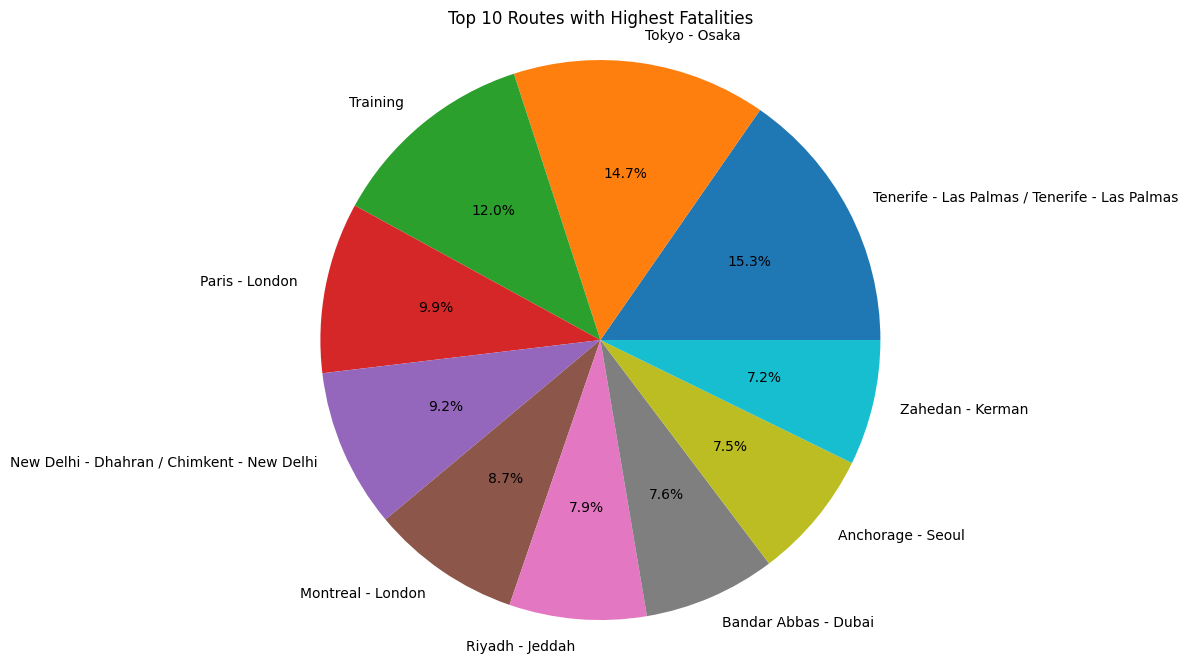

In [59]:
# Pie Chart of Top 10 Routes Associated with the highest Fatalities

# Plotting the pie chart
plt.figure(figsize=(10, 8))

plt.pie(routes_crashes_10, labels=routes_crashes_10.index, autopct='%1.1f%%', startangle=0)

plt.title('Top 10 Routes with Highest Fatalities')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.savefig('output_data/13_pie_Top_10_Routes_and_Fatalities.png')

plt.show()

## Objective 3: To Is find out if there is a relationship / correlation between the number of passengers on board an aircraft and the fatalities resulting from aviation crashes

In [60]:
# Fatalities based on Civilian/Military
flight_category = flight_data_df.groupby('Civilian/Military')[['Aboard', 'Fatalities']]
flight_category.describe()

Aboard                                                      \
                    count       mean        std  min   25%   50%   75%    max   
Civilian/Military                                                               
Civilian           4467.0  27.557869  45.268359  1.0   4.0  11.0  29.5  644.0   
Military            779.0  27.535302  27.322735  0.0  13.0  21.0  32.0  330.0   

                  Fatalities                                               \
                       count       mean        std  min   25%   50%   75%   
Civilian/Military                                                           
Civilian              4487.0  19.125474  34.416959  0.0   3.0   7.0  20.0   
Military               781.0  25.176697  24.256366  0.0  12.0  20.0  29.0   

                          
                     max  
Civilian/Military         
Civilian           583.0  
Military           275.0

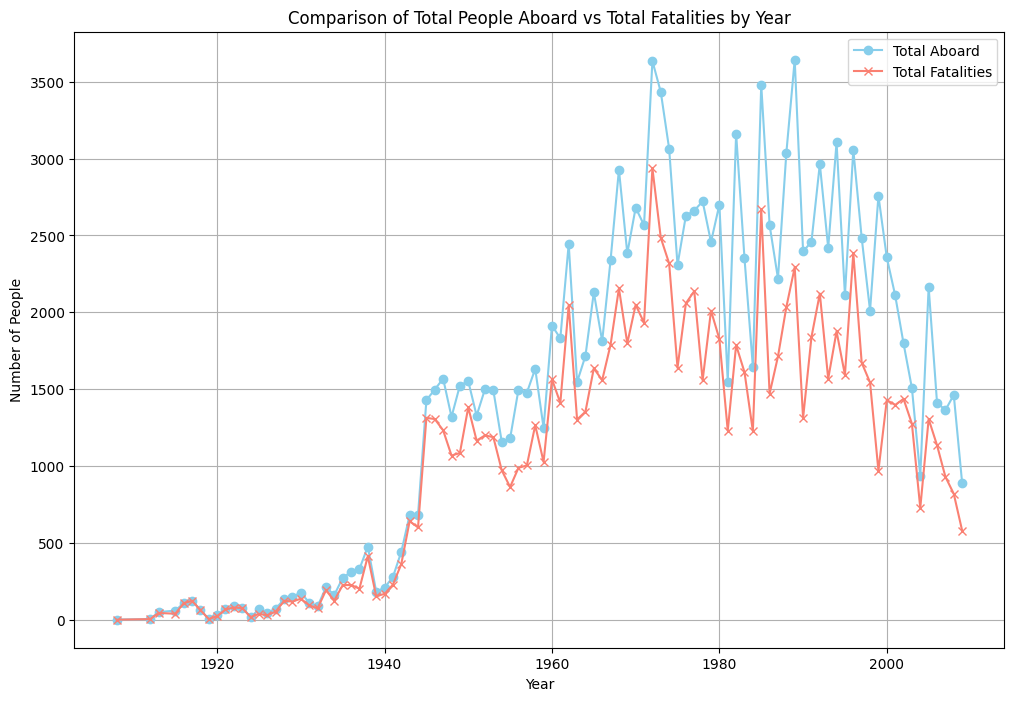

In [61]:
# Group by 'Year' and calculate total people aboard and total fatalities
grouped_data = flight_data_df.groupby('Year').agg({'Aboard': 'sum', 'Fatalities': 'sum'}).reset_index()

# Create a line chart to compare total people aboard and total fatalities based on the year
plt.figure(figsize=(12, 8))
plt.plot(grouped_data['Year'], grouped_data['Aboard'], marker='o', label='Total Aboard', color='skyblue')
plt.plot(grouped_data['Year'], grouped_data['Fatalities'], marker='x', label='Total Fatalities', color='salmon')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Comparison of Total People Aboard vs Total Fatalities by Year')
plt.legend()
plt.grid(True)
plt.savefig('output_data/14_Line_Aboard_vs_Fatalities.png')
plt.show()

In [62]:
# Define a function to assess the relationships and calculate the slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

from scipy.stats import linregress

def linear_regression_plot(x_values, y_values, xlabel, ylabel, title, file_name=None):
    # Function to create a linear regression plot.

    # Parameters:
    # x_values: The values for the x-axis.
    # y_values: The values for the y-axis.
    # xlabel: The label for the x-axis.
    # ylabel: The label for the y-axis.
    # title: The title of the plot.
    # file_name: The file name for saving the plot (optional).

    # Returns:
    # None

    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.figure(figsize=(10, 5))
    plt.scatter(x_values, y_values, edgecolors='black', alpha=0.7)

    # Plot regression line
    plt.plot(x_values, regress_values, color='red')

    # Annotate the linear regression equation and correlation coefficient on the plot
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}\nR² = {round(rvalue**2, 2)}'
    plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=12, color='red', xytext=(20, -20), textcoords='offset points')

    # Set plot labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Save the figure if has file_name
    if file_name:
        plt.savefig(file_name)

    # Show plot
    plt.show()

# # Test
# linear_regression_plot(flight_data_df['Aboard'], flight_data_df['Fatalities'], 'Aboard', 'Fatalities', 
#                        'Fatalities vs. Aboard Linear Regression', 'output_data/fatalities_vs_aboard_regression.png')


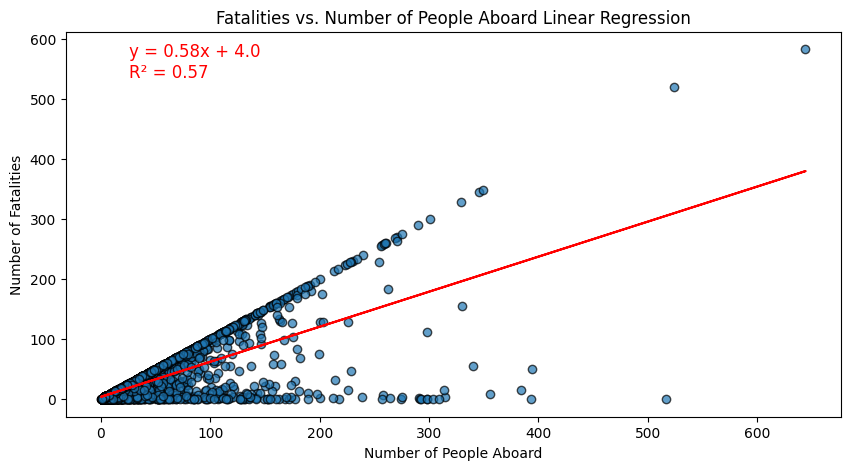

In [63]:
# Plot the scatter graph and calculate the co-effiecents of the underlying relationship

# import seaborn as sns

# Drop rows with NaN values
flight_data_df.dropna(subset=['Aboard', 'Fatalities'], inplace=True)

# Perform linear regression plot after handling NaN values
linear_regression_plot(flight_data_df['Aboard'], flight_data_df['Fatalities'], 
                       'Number of People Aboard', 'Number of Fatalities', 
                       'Fatalities vs. Number of People Aboard Linear Regression',  'output_data/15_fatalities_vs_aboard_regression.png')